## Loading of Miller ECoG data of faces/houses (+ noise)

includes some visualizations

In [48]:
#@title Data retrieval
import os, requests

fname = 'faceshouses.npz'
url = "https://osf.io/argh7/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [49]:
#@title Install packages, import matplotlib and set defaults
# install packages to visualize brains and electrode locations
!pip install nilearn --quiet
!pip install nimare --quiet

from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [50]:
#@title Data loading
import numpy as np
import warnings
warnings.filterwarnings("ignore")
alldat = np.load(fname, allow_pickle=True)['dat']

# select just one of the recordings here. 
dat1 = alldat[1][0]
dat2 = alldat[1][1]

print(dat1.keys())
print(dat2.keys())

dict_keys(['t_off', 'stim_id', 't_on', 'srate', 'V', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])
dict_keys(['stim_id', 'stim_cat', 'stim_noise', 't_on', 't_off', 'key_press', 'V', 'categories', 'scale_uv', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


# Dataset info #

This is one of multiple ECoG datasets from Miller 2019, recorded in a clinical settings with a variety of tasks. We plan to curate a few more before NMA starts. Raw data here:

https://exhibits.stanford.edu/data/catalog/zk881ps0522

`alldat` contains 7 subjects each with two sessions `dat1` and `dat2`, and was originally used in these publications: 

*Miller, Kai J., et al. "Face percept formation in human ventral temporal cortex." Journal of neurophysiology 118.5 (2017): 2614-2627.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

*Miller, Kai J., et al. "The physiology of perception in human temporal lobe is specialized for contextual novelty." Journal of neurophysiology 114.1 (2015): 256-263.*

*Miller, Kai J., et al. "Spontaneous decoding of the timing and content of human object perception from cortical surface recordings reveals complementary information in the event-related potential and broadband spectral change." PLoS computational biology 12.1 (2016): e1004660.*

In this task, subjects in a clinical settings (with ECoG implants) are passively shown faces and house during the first experiment (`dat1`). Then in the second experiment in the same subjects (`dat2`), noise is added to face and houses images and the subject has to detect the faces by pressing a key. Two of the subjects don't have keypresses. 

Sample rate is always 1000Hz, and the ECoG data has been notch-filtered at 60, 120, 180, 240 and 250Hz, followed by z-scoring across time and conversion to float16 to minimize size. 

Experiment 1: 
* `dat1['V']`: continuous voltage data (time by channels)
* `dat1['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat1['t_on']`: time of stimulus onset in data samples
* `dat1['t_off']`: time of stimulus offset, always 400 samples after `t_on`
* `dat1['stim_id`]: identity of stimulus from 1-100, with 1-50 being houses and 51-100 being faces
* `dat1['locs`]: 3D electrode positions on the brain surface

Experiment 2: 
* `dat2['V`]: continuous voltage data (time by channels)
* `dat2['srate']`: acquisition rate (1000 Hz). All stimulus times are in units of this.  
* `dat2['t_on']`: time of stimulus onset in data samples
* `dat2['t_off']`: time of stimulus offset, always 1000 samples after `t_on`, with no inter-stimulus interval
* `dat2['stim_id`]: identity of stimulus from 1-600 (not really useful, since we don't know which ones are the same house/face)
* `dat2['stim_cat']`: stimulus category (1 = house, 2 = face)
* `dat2['stim_noise']`: percent noise from 0 to 100
* `dat2['key_press']`: when the subject thought the image was a face
* `dat2['categories']`: categories legend (1 = house, 2 = face)
* `dat2['locs`]: 3D electrode positions on the brain surface


In [51]:
from nilearn import plotting  
from nimare import utils
"""
plt.figure(figsize=(8,8))
locs = dat1['locs']
view = plotting.view_markers(utils.tal2mni(locs), marker_labels  = ['%d'%k for k in np.arange(locs.shape[0])], marker_color = 'purple', marker_size=5)
view
"""

"\nplt.figure(figsize=(8,8))\nlocs = dat1['locs']\nview = plotting.view_markers(utils.tal2mni(locs), marker_labels  = ['%d'%k for k in np.arange(locs.shape[0])], marker_color = 'purple', marker_size=5)\nview\n"

In [52]:
"""
dat3 = alldat[5][0]
locs2 = dat3['locs']
view2 = plotting.view_markers(utils.tal2mni(locs2), marker_labels  = ['%d'%k for k in np.arange(locs2.shape[0])], marker_color = 'purple', marker_size=5)
view2
"""

"\ndat3 = alldat[5][0]\nlocs2 = dat3['locs']\nview2 = plotting.view_markers(utils.tal2mni(locs2), marker_labels  = ['%d'%k for k in np.arange(locs2.shape[0])], marker_color = 'purple', marker_size=5)\nview2\n"

In [53]:
# visualize 5 patient's voltage during experiment 2 and their channel numbers
alldat[0][1]["V"]  # [suject_no][experiment_no][data_name]
new_alldat = np.array([alldat[item,:][1] for item in [0,3,4,5,6]])  #[suject_no][data_name]

"""
aaa=0
for x in range(len(new_alldat)): #len(new_alldat)
  aaa+=(new_alldat[x]["V"].shape[0]//1000)
  print(new_alldat[x]["V"].shape[1])
  #print(aaa)
  y = new_alldat[x]["V"][:,0].T
  xx = [time for time in range(len(y))]
  #plt.subplot(5,1,x+1)
  plt.plot(xx,y)
  plt.ylim(-10,10)
  plt.xlim(0,len(xx))
"""
"""
plt.figure(figsize=(20,10))
for x in range(4): #len(new_alldat)
  for j in range(len(new_alldat[x]["V"][1])):
    y = new_alldat[x]["V"][:,j].T
    xx = [time for time in range(len(y))]
    ax = plt.subplot(6,10,j+1)
    plt.plot(xx, y)
    plt.title('ch%d'%j)
    plt.ylim([-10, 10])
"""
"""
print(aaa)
plt.show()

print(new_alldat[1]["V"][1] == new_alldat[0]["V"][1])

"""

'\nprint(aaa)\nplt.show()\n\nprint(new_alldat[1]["V"][1] == new_alldat[0]["V"][1])\n\n'

In [54]:
# 45-55 noise rate face that has pressed, 45-55 noise faces/houses , 45-55 noise faces
for zz in range(len(new_alldat)):
  press_num=0
  all=0
  true=0
  for index,x in enumerate(new_alldat[zz]['stim_noise']):
    if 45<x[0]<55:
      all+=1
      yy=index*1000
      kk=(new_alldat[zz]['key_press']//1000)*1000
      for item in kk:
        if yy == item:
          press_num+=1
      if new_alldat[zz]['stim_cat'][index]==1:
        true+=1
  print(press_num,all,true)

5 30 15
6 30 15
6 30 15
14 30 15
9 30 15


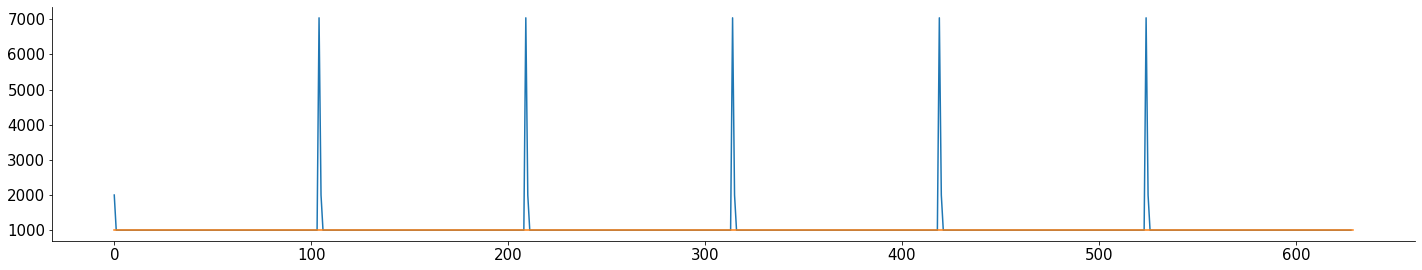

In [55]:
# visualize 1) time interval between stimuli_on and stimuli_off  values
#           2) time interval between the two stimuli's stimuli_on value
for xc in range(len(new_alldat)):
  x = np.diff(new_alldat[xc]["t_on"])
  y = np.diff(new_alldat[xc]["t_off"])


plt.plot(list(range(len(x))),x)


diff = -new_alldat[xc]["t_on"] + new_alldat[xc]["t_off"]
plt.plot(list(range(len(new_alldat[xc]["t_on"]))),diff)


In [56]:
# control how many 1000 ms time bins we have
a=0
for yy in range(len(new_alldat)):
  a+=len(new_alldat[yy]["t_on"])*new_alldat[yy]["V"].shape[1]
print(a)

axa=0
for zz in range(len(new_alldat)):
  axa+=new_alldat[zz]["V"].shape[1]*new_alldat[zz]["stim_id"].shape[0]
print(axa)

161280
161280


In [57]:
# broadband power analysis
from scipy import signal

new_alldat2=np.array(new_alldat, copy=True) 
for sc in range(len(new_alldat)): #len(new_alldat)
  #for chl_num in range(new_alldat[sc]["V"].shape[1]): #new_alldat[sc]["V"].shape[1]
    V = new_alldat[sc]["V"].astype('float16')  #[:,chl_num]
    b, a = signal.butter(3, [50], btype = 'high', fs=1000)
    V = signal.filtfilt(b,a,V,0)
    V = np.abs(V)**2
    b, a = signal.butter(3, [10], btype = 'low', fs=1000)
    V = signal.filtfilt(b,a,V,0)
    V = V/V.mean(0)
    new_alldat2[sc]["V"]=V #[:,chl_num]


""" 
So, the broadband power is defined as the total power in all the frequencies above 50Hz. This, in our case, means power in the 50-250Hz range, as the signal is lowpass filtered at 250Hz
Now, there are many ways to compute the power of a signal in a specified frequency band. You could, for example, compute the Short-time Fourier Transform of your signal and sum the absolute value of all the frequency bins above 50Hz; another option is to filter out the unwanted frequencies, and then compute the overall signal energy over a sliding window. The energy of a signal is defined as the sum of the squared values of the voltage over a period, so to compute the instantaneous power you can take the squared voltage trace and pass it through a moving average filter, which acts like a lowpass filter.
So the sequence of operations (filter, square, moving average) is equivalent to (filter, square, lowpass) which is what you have in the notebook 
"""

' \nSo, the broadband power is defined as the total power in all the frequencies above 50Hz. This, in our case, means power in the 50-250Hz range, as the signal is lowpass filtered at 250Hz\nNow, there are many ways to compute the power of a signal in a specified frequency band. You could, for example, compute the Short-time Fourier Transform of your signal and sum the absolute value of all the frequency bins above 50Hz; another option is to filter out the unwanted frequencies, and then compute the overall signal energy over a sliding window. The energy of a signal is defined as the sum of the squared values of the voltage over a period, so to compute the instantaneous power you can take the squared voltage trace and pass it through a moving average filter, which acts like a lowpass filter.\nSo the sequence of operations (filter, square, moving average) is equivalent to (filter, square, lowpass) which is what you have in the notebook \n'

In [58]:
# split all voltage values into 1000 ms time bins
subjects=np.zeros((630,1000,1),dtype='float16')
for xc in range(len(new_alldat2)):
  continue
  start = new_alldat2[xc]["t_on"]
  stop = new_alldat2[xc]["t_off"]
  channels=np.zeros((630,1000),dtype='float16')
  for j in range(new_alldat2[xc]["V"].shape[1]):
    empty_time_bin=new_alldat2[xc]["V"][:,j][start[0]:stop[0]].T
    empty_time_bin=np.zeros(1000,dtype='float16')
    for bit in range(len(start)):
      interval_stimuli_voltage=new_alldat2[xc]["V"][:,j][start[bit]:stop[bit]].T
      #print(interval_stimuli_voltage.shape,empty_time_bin.shape)
      empty_time_bin=np.vstack((empty_time_bin,interval_stimuli_voltage))
    empty_time_bin=empty_time_bin[1:,:]
    #print(channels.shape,empty_time_bin.shape)
    channels=np.dstack((channels,empty_time_bin))
  channels=channels[:,:,1:]
  #print(subjects.shape,channels.shape)
  subjects=np.dstack((subjects,channels))
subjects=subjects[:,:,1:]
print(subjects.shape)


(630, 1000, 0)


In [59]:
# control 1000 ms time bins whether or not they were splitted correctly.

for zz in range(256):
  continue
  if zz<41: 
    sub_id=0
    chl_num=zz
  elif zz<101: 
    sub_id=1
    chl_num=zz-41
  elif zz<159: 
    sub_id=2
    chl_num=zz-101
  elif zz<198: 
    sub_id=3
    chl_num=zz-159
  else: 
    sub_id=4
    chl_num=zz-198
  start = new_alldat2[sub_id]["t_on"]
  stop = new_alldat2[sub_id]["t_off"]
  for stim_num in range(630):
    for m_sec in range(1000):
      if not subjects[stim_num,m_sec,zz] == new_alldat2[sub_id]["V"][:,chl_num][start[stim_num]:stop[stim_num]][m_sec]:
        print(stim_num,m_sec,zz,sub_id,subjects[stim_num,m_sec,zz],new_alldat2[sub_id]["V"][:,chl_num][start[stim_num]:stop[stim_num]][m_sec])
print("no problem has occured")

no problem has occured


In [60]:
# visualize broadband power analysis for patient 0

"""
plt.figure(figsize=(20,10))
for sc in range(1): #len(new_alldat)
  for j in range(60):
    ax = plt.subplot(6,10,j+1)
    try:
      plt.plot(np.array(range(new_alldat2[sc]["V"].shape[0])),new_alldat2[sc]["V"][:,j])
    except:
      pass
    plt.title('ch%d'%j)
"""

'\nplt.figure(figsize=(20,10))\nfor sc in range(1): #len(new_alldat)\n  for j in range(60):\n    ax = plt.subplot(6,10,j+1)\n    try:\n      plt.plot(np.array(range(new_alldat2[sc]["V"].shape[0])),new_alldat2[sc]["V"][:,j])\n    except:\n      pass\n    plt.title(\'ch%d\'%j)\n'

In [61]:
# visualize broadband power analysis for patient 1

"""
plt.figure(figsize=(20,10))
for sc in range(1,2): #len(new_alldat)
  for j in range(60):
    ax = plt.subplot(6,10,j+1)
    try:
      plt.plot(np.array(range(new_alldat2[sc]["V"].shape[0])),new_alldat2[sc]["V"][:,j])
    except:
      pass
    plt.title('ch%d'%j)
"""

'\nplt.figure(figsize=(20,10))\nfor sc in range(1,2): #len(new_alldat)\n  for j in range(60):\n    ax = plt.subplot(6,10,j+1)\n    try:\n      plt.plot(np.array(range(new_alldat2[sc]["V"].shape[0])),new_alldat2[sc]["V"][:,j])\n    except:\n      pass\n    plt.title(\'ch%d\'%j)\n'

In [62]:
#    MLPClassifier  RandomForestClassifier   SVM   LogisticRegression

import pickle
from google.colab import drive
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import warnings


drive.mount('/content/drive')
warnings.filterwarnings("ignore")
path="/content/drive/MyDrive/pickled_data/"
pickle_in=open(path+"data.pickle","rb")
data=pickle.load(pickle_in)

#record_list=[]

space={"spaceLR" : {    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
               'penalty' : ['l2'],
               'C' : [100, 10, 1.0, 0.1, 0.01]},

"spaceSVM" : {  'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'], 
              'class_weight':['balanced', None]},

"spaceRF" : {    'bootstrap': [True, False],
               'criterion': ['entropy', 'gini'],
               #'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_depth': [None,10, 142, 274, 406, 538, 671, 803, 935, 1067, 1200],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators':[151, 267, 384, 500, 617, 733, 850, 966, 1083, 1200]},
               #'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

"spaceNN" : { 'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
            'activation': ['tanh', 'relu'],
            'solver': ['sgd', 'adam'],
            'alpha': [0.0001, 0.05],
            'learning_rate': ['constant','adaptive']}}

def record(record_ls,ac1,ac2,ac3,ac4,sub_id=None,pcas=0):
  if pcas==1:
    record_ls.append([sub_id,ac1,ac2,ac3,ac4,"pca"])
    return 0
  record_ls.append([sub_id,ac1,ac2,ac3,ac4])

def pickle_it(models,sub_id,model_names=["RF","LR","SVM","NN"],pcas="",path="/content/drive/MyDrive/pickled_data/"):
  index=0
  for model in models:
    pickle_out=open(path+"pr_model"+model_names[index]+str(sub_id)+pcas+".pickle","wb")
    pickle.dump(model,pickle_out)
    pickle_out.close()
    index+=1

def pca(x,y):
  pca = PCA(n_components=0.8)
  principalComponents = pca.fit_transform(x)
  return principalComponents

def method(XX,y_face,space,pcas=0,sub=None):
  for xx in range(XX.shape[0]):
    for yy in range(XX.shape[2]):
      XX[xx,:,yy]=np.mean(XX[xx,:,yy])
  XX=XX.reshape(XX.shape[0],XX.shape[1]*XX.shape[2])
  XX=XX[:,::1000]

  if pcas==1:
    XX=pca(XX,y)
  
  X_tr=XX[:600,:]
  X_test=XX[600:,:]
  y_tr=y_patients[sub][:600]
  y_test=y_patients[sub][600:]
################################################################################
  
  LR = LogisticRegression()
  modelLR = RandomizedSearchCV(estimator = LR, param_distributions = space["spaceLR"], 
                             n_iter = 80, cv = 4, verbose= 5, random_state= 101
                             , n_jobs = -1).fit(X_tr,y_tr)
  predictionforestLR = modelLR.best_estimator_.predict(X_test)
  ff = accuracy_score(y_test,predictionforestLR)
  
################################################################################
  
  SVM = svm.SVC()
  modelSVM = RandomizedSearchCV(estimator = SVM, param_distributions = space["spaceSVM"], 
                             n_iter = 80, cv = 4, verbose= 5, random_state= 101
                             , n_jobs = -1).fit(X_tr,y_tr)
  predictionforestSVM = modelSVM.best_estimator_.predict(X_test)
  xx = accuracy_score(y_test,predictionforestSVM)
  
################################################################################
  
  RF = RandomForestClassifier()
  modelRF = RandomizedSearchCV(estimator = RF, param_distributions = space["spaceRF"], 
                             n_iter = 80, cv = 4, verbose= 5, random_state= 101
                             , n_jobs = -1).fit(X_tr,y_tr)
  predictionforestRF = modelRF.best_estimator_.predict(X_test)
  yy = accuracy_score(y_test,predictionforestRF)
  
################################################################################ 
   
  NN = MLPClassifier()
  modelNN = RandomizedSearchCV(estimator = NN, param_distributions = space["spaceNN"], 
                             n_iter = 80, cv = 4, verbose= 5, random_state= 101
                             , n_jobs = -1).fit(X_tr,y_tr)
  predictionforestNN = modelNN.best_estimator_.predict(X_test)
  zz = accuracy_score(y_test,predictionforestNN)
  
################################################################################
  kelime="___"
  if pcas==1:
    kelime="___"
  print( "__"+kelime+"__Patient ",sub_id+1,"===>  MLPClassifier: ",zz,
        "  RandomForestClassifier: ",yy,"  SVM: ",
        xx,"  LogisticRegression: ",ff,"\n")

  return zz,yy,xx,ff,modelRF,modelLR,modelSVM,modelNN



for sub_id in range(new_alldat.shape[0]): #new_alldat.shape[0]
  continue
  if sub_id == 0: 
    category=new_alldat[sub_id]['stim_cat'].T[0]
    y_face=category-np.ones(category.shape[0],dtype=int)
    y_house=category- 2*y_face
    x=data[:,:,:41]
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id)
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,1,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id,pcas=1)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id,pcas="pca")
    
  elif sub_id == 1: 
    category=new_alldat[sub_id]['stim_cat'].T[0]
    y_face=category-np.ones(category.shape[0],dtype=int)
    y_house=category- 2*y_face
    x=data[:,:,41:101]
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id)
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,1,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id,pcas=1)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id,pcas="pca")

  elif sub_id == 2: 
    category=new_alldat[sub_id]['stim_cat'].T[0]
    y_face=category-np.ones(category.shape[0],dtype=int)
    y_house=category- 2*y_face
    x=data[:,:,101:159]
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id)
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,1,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id,pcas=1)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id,pcas="pca")

  elif sub_id == 3: 
    category=new_alldat[sub_id]['stim_cat'].T[0]
    y_face=category-np.ones(category.shape[0],dtype=int)
    y_house=category- 2*y_face
    x=data[:,:,159:198]
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id)
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,1,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id,pcas=1)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id,pcas="pca")

  elif sub_id == 4: 
    category=new_alldat[sub_id]['stim_cat'].T[0]
    y_face=category-np.ones(category.shape[0],dtype=int)
    y_house=category- 2*y_face
    x=data[:,:,198:256]
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id)
    NN_acc,RF_acc,SVM_acc,LR_acc,RF_model,LR_model,SVM_model,NN_model=method(x,y_face,space,1,sub=sub_id)
    record(record_list,NN_acc,RF_acc,SVM_acc,LR_acc,sub_id,pcas=1)
    pickle_it([RF_model,LR_model,SVM_model,NN_model],sub_id,pcas="pca")

    pickle_outt=open("/content/drive/MyDrive/pickled_data/pr_accuracy.pickle","wb")
    pickle.dump(record_list,pickle_outt)
    pickle_outt.close()

# 4/1AX4XfWilFhWw3fAP-Z7zqNnk31yrTdraXicp0nW8LqxY0_s5grQj6tHSyq4

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Model Accuracies that has been trained and tested with patients’ responses (w/wo PCA) (after tuning hyperparameter)

path="/content/drive/MyDrive/pickled_data/"
pickle_in=open(path+"pr_accuracy.pickle","rb")
pr_acc=pickle.load(pickle_in)

print("Model Accuracies that has been trained and tested with patients’ responses (w/wo PCA) (after tuning hyperparameter)\n")
print("_"*103,"\n")
print("-"*46,"NORMAL","-"*49)
print("_"*103,"\n")
for item in pr_acc:
  if len(item)==5:
    print("Patient ",item[0],"==>"," MLPClassifier: ",round(item[1], 2)," RandomForestClassifier: ",round(item[2], 2)," SVM: ",round(item[3], 2)," LogisticRegression: ",round(item[4], 2),"\n")
print("_"*103,"\n")
print("-"*47,"PCA","-"*51)
print("_"*103,"\n")
for item in pr_acc:
  if len(item)==6:
    print("Patient ",item[0],"==>"," MLPClassifier: ",round(item[1], 2)," RandomForestClassifier: ",round(item[2], 2)," SVM: ",round(item[3], 2)," LogisticRegression: ",round(item[4], 2),"\n")



Model Accuracies that has been trained and tested with patients’ responses (w/wo PCA) (after tuning hyperparameter)

_______________________________________________________________________________________________________ 

---------------------------------------------- NORMAL -------------------------------------------------
_______________________________________________________________________________________________________ 

Patient  0 ==>  MLPClassifier:  0.9  RandomForestClassifier:  0.93  SVM:  0.9  LogisticRegression:  0.9 

Patient  1 ==>  MLPClassifier:  0.93  RandomForestClassifier:  0.93  SVM:  0.93  LogisticRegression:  0.93 

Patient  2 ==>  MLPClassifier:  0.83  RandomForestClassifier:  0.83  SVM:  0.8  LogisticRegression:  0.63 

Patient  3 ==>  MLPClassifier:  0.67  RandomForestClassifier:  0.77  SVM:  0.73  LogisticRegression:  0.73 

Patient  4 ==>  MLPClassifier:  0.43  RandomForestClassifier:  0.43  SVM:  0.4  LogisticRegression:  0.57 

___________________________

In [64]:
#Model Accuracies that has been trained and tested with patients’ responses (w/wo PCA) (after tuning hyperparameter)

path="/content/drive/MyDrive/pickled_data/"
pickle_in=open(path+"accuracy.pickle","rb")
acc=pickle.load(pickle_in)

print("Model Accuracies (trained via actual label) for model prediction vs actual stimuli label (after Hyperparameter Tuning)\n")
print("_"*103,"\n")
print("-"*46,"NORMAL","-"*49)
print("_"*103,"\n")
for item in acc:
  if len(item)==5:
    print("Patient ",item[0],"==>"," MLPClassifier: ",round(item[1], 2)," RandomForestClassifier: ",round(item[2], 2)," SVM: ",round(item[3], 2)," LogisticRegression: ",round(item[4], 2),"\n")
print("_"*103,"\n")
print("-"*47,"PCA","-"*51)
print("_"*103,"\n")
for item in acc:
  if len(item)==6:
    print("Patient ",item[0],"==>"," MLPClassifier: ",round(item[1], 2)," RandomForestClassifier: ",round(item[2], 2)," SVM: ",round(item[3], 2)," LogisticRegression: ",round(item[4], 2),"\n")


Model Accuracies (trained via actual label) for model prediction vs actual stimuli label (after Hyperparameter Tuning)

_______________________________________________________________________________________________________ 

---------------------------------------------- NORMAL -------------------------------------------------
_______________________________________________________________________________________________________ 

Patient  Patient 0 ==>  MLPClassifier:  0.7  RandomForestClassifier:  0.7  SVM:  0.7  LogisticRegression:  0.77 

Patient  Patient 1 ==>  MLPClassifier:  0.43  RandomForestClassifier:  0.4  SVM:  0.43  LogisticRegression:  0.4 

Patient  Patient 2 ==>  MLPClassifier:  0.4  RandomForestClassifier:  0.47  SVM:  0.5  LogisticRegression:  0.4 

Patient  Patient 3 ==>  MLPClassifier:  0.63  RandomForestClassifier:  0.67  SVM:  0.47  LogisticRegression:  0.53 

Patient  Patient 4 ==>  MLPClassifier:  0.4  RandomForestClassifier:  0.67  SVM:  0.63  LogisticRegressi

In [65]:
# Patient’s Key Press Accuracies 

aralik1,aralik2=0,630
y_patients=[]
for zz in range(len(new_alldat2)):
  y_patient=[]
  index=0
  press=0
  press_num=len(new_alldat2[zz]['key_press'])
  y=new_alldat2[zz]['stim_cat'][aralik1:aralik2]
  y=y[y==2]
  face_num=len(y)
  all=len(new_alldat2[zz]['t_on'][aralik1:aralik2])
  true=0
  for time in range(all):
    x=new_alldat2[zz]['key_press'][index]
    #print(x)
    x0,x1=new_alldat2[zz]['t_on'][time],new_alldat2[zz]['t_off'][time]
    #print(x0,x,x1)
    if x0<x<x1 and index<len(new_alldat2[zz]['key_press'])-1:
      #print(x0,x,x1)
      index+=1
      y_patient.append(1)
      if new_alldat2[zz]['stim_cat'][time]==2:
        true+=1
    else: y_patient.append(0)
    if x<x0 and index<len(new_alldat2[zz]['key_press'])-1: index+=1
  print("Patient ",zz," ==> "," All stimuli: ",all," Pressed stimuli: ",press_num," Face stimuli: ",face_num," Truely pressed stimuli: ",true," Recognition accuracy: ",(true/face_num)*100,"\n")
  y_patients.append(y_patient)


Patient  0  ==>   All stimuli:  630  Pressed stimuli:  133  Face stimuli:  315  Truely pressed stimuli:  116  Recognition accuracy:  36.82539682539683 

Patient  1  ==>   All stimuli:  630  Pressed stimuli:  141  Face stimuli:  315  Truely pressed stimuli:  130  Recognition accuracy:  41.269841269841265 

Patient  2  ==>   All stimuli:  630  Pressed stimuli:  106  Face stimuli:  315  Truely pressed stimuli:  84  Recognition accuracy:  26.666666666666668 

Patient  3  ==>   All stimuli:  630  Pressed stimuli:  354  Face stimuli:  315  Truely pressed stimuli:  195  Recognition accuracy:  61.904761904761905 

Patient  4  ==>   All stimuli:  630  Pressed stimuli:  304  Face stimuli:  315  Truely pressed stimuli:  163  Recognition accuracy:  51.746031746031754 



In [66]:

for sub_id in range(len(y_patients)):
  #continue
  if sub_id==0:
    x=data[:,:,:41]
  if sub_id==1:
    x=data[:,:,41:101]
  if sub_id==2:
    x=data[:,:,101:159]
  if sub_id==3:
    x=data[:,:,159:198]
  if sub_id==4:
    x=data[:,:,198:256]

  for xx in range(x.shape[0]):
    for yy in range(x.shape[2]):
      x[xx,:,yy]=np.mean(x[xx,:,yy])
  x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
  x=x[:,::1000]
  X_test=x[600:,:]
  y_test=y_patients[sub_id][600:]

  pickle_in=open(path+"pr_modelLR"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestLR = model.best_estimator_.predict(X_test)
  ff = accuracy_score(y_test,predictionforestLR)

################################################################################

  pickle_in=open(path+"pr_modelSVM"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestSVM = model.best_estimator_.predict(X_test)
  xx = accuracy_score(y_test,predictionforestSVM)

################################################################################

  pickle_in=open(path+"pr_modelRF"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestRF = model.best_estimator_.predict(X_test)
  yy = accuracy_score(y_test,predictionforestRF)

################################################################################ 

  pickle_in=open(path+"pr_modelNN"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestNN = model.best_estimator_.predict(X_test)
  zz = accuracy_score(y_test,predictionforestNN)


  print( "Patient ",sub_id,"===>  MLPClassifier: ",round(zz,2),
        "  RandomForestClassifier: ",round(yy,2),"  SVM: ",
        round(xx,2),"  LogisticRegression: ",round(ff,2),"\n")


Patient  0 ===>  MLPClassifier:  0.9   RandomForestClassifier:  0.93   SVM:  0.9   LogisticRegression:  0.9 

Patient  1 ===>  MLPClassifier:  0.93   RandomForestClassifier:  0.93   SVM:  0.93   LogisticRegression:  0.93 

Patient  2 ===>  MLPClassifier:  0.83   RandomForestClassifier:  0.83   SVM:  0.8   LogisticRegression:  0.63 

Patient  3 ===>  MLPClassifier:  0.67   RandomForestClassifier:  0.77   SVM:  0.73   LogisticRegression:  0.73 

Patient  4 ===>  MLPClassifier:  0.43   RandomForestClassifier:  0.43   SVM:  0.4   LogisticRegression:  0.57 



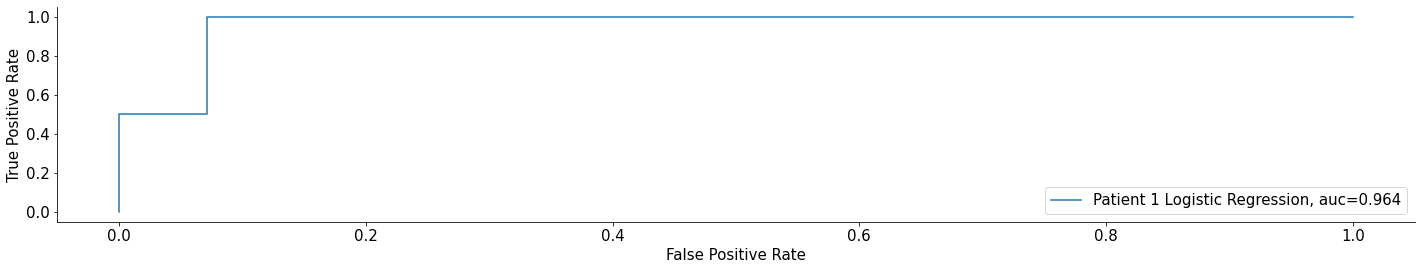

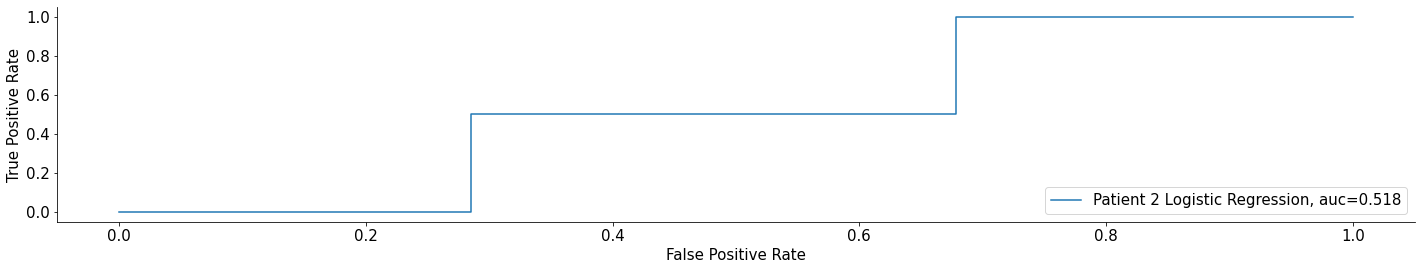

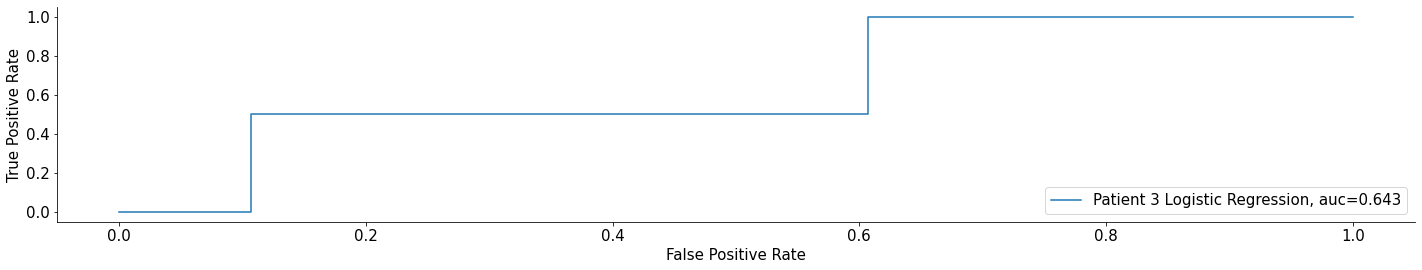

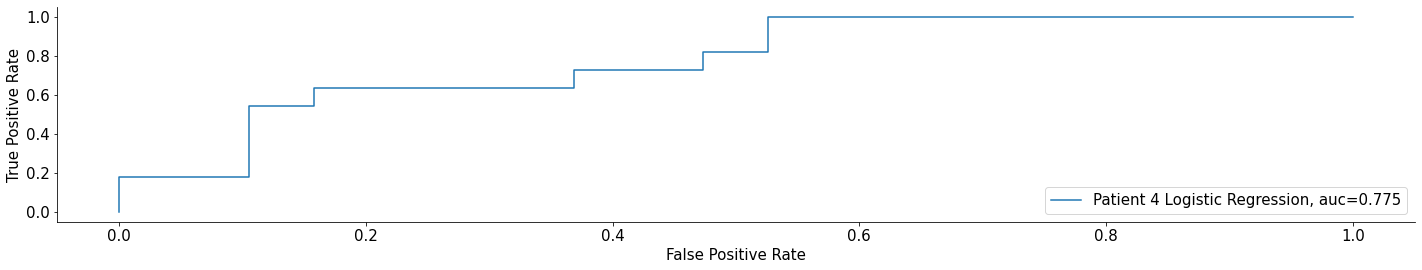

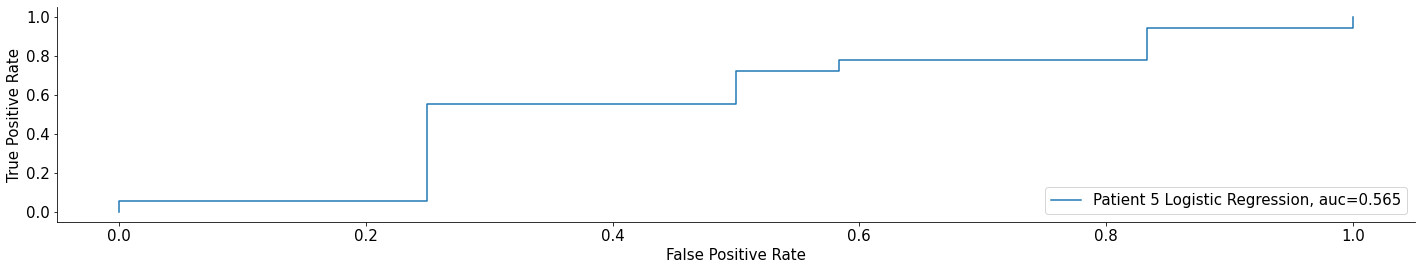

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


for sub_id in range(len(y_patients)):
  #continue
  if sub_id==0:
    x=data[:,:,:41]
  if sub_id==1:
    x=data[:,:,41:101]
  if sub_id==2:
    x=data[:,:,101:159]
  if sub_id==3:
    x=data[:,:,159:198]
  if sub_id==4:
    x=data[:,:,198:256]

  for xx in range(x.shape[0]):
    for yy in range(x.shape[2]):
      x[xx,:,yy]=np.mean(x[xx,:,yy])
  x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
  x=x[:,::1000]
  X_test=x[600:,:]
  y_test=y_patients[sub_id][600:]
  pickle_in=open(path+"pr_modelLR"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestLR = model.best_estimator_
  y_pred_proba = predictionforestLR.predict_proba(X_test)[::,1]
  fpr, tpr,_ = roc_curve(y_test,  y_pred_proba)
  auc=roc_auc_score(y_test, y_pred_proba)
  auc=round(auc, 3) #rounding off
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.plot(fpr,tpr,label="Patient "+str(sub_id+1)+" Logistic Regression, auc="+str(auc))
  plt.legend(loc=4)
  plt.savefig("figname_patient"+str(sub_id+1)+".png", bbox_inches='tight', dpi=600)
  plt.show()

In [68]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

for sub_id in range(len(y_patients)):
  #continue
  if sub_id==0:
    x=data[:,:,:41]
  if sub_id==1:
    x=data[:,:,41:101]
  if sub_id==2:
    x=data[:,:,101:159]
  if sub_id==3:
    x=data[:,:,159:198]
  if sub_id==4:
    x=data[:,:,198:256]

  for xx in range(x.shape[0]):
    for yy in range(x.shape[2]):
      x[xx,:,yy]=np.mean(x[xx,:,yy])
  x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
  x=x[:,::1000]
  X_test=x[600:,:]
  y_test=y_patients[sub_id][600:]
  pickle_in=open(path+"pr_modelLR"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  predictionforestLR = model.best_estimator_
  p1=predictionforestLR.predict(X_test)
  f1_score(y_test, p1)
  print("Patient ",sub_id+1," Full classification report : ")
  print(classification_report(y_test, p1))

Patient  1  Full classification report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.33      0.50      0.40         2

    accuracy                           0.90        30
   macro avg       0.65      0.71      0.67        30
weighted avg       0.92      0.90      0.91        30

Patient  2  Full classification report : 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       0.00      0.00      0.00         2

    accuracy                           0.93        30
   macro avg       0.47      0.50      0.48        30
weighted avg       0.87      0.93      0.90        30

Patient  3  Full classification report : 
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.09      0.50      0.15         2

    accuracy                           0.63        30
  

In [110]:
for sub_id in range(len(new_alldat2)): #len(new_alldat2)
  #continue
  if sub_id==0:
    x=data[:,:,:41]
  if sub_id==1:
    x=data[:,:,41:101]
  if sub_id==2:
    x=data[:,:,101:159]
  if sub_id==3:
    x=data[:,:,159:198]
  if sub_id==4:
    x=data[:,:,198:256]

  for xx in range(x.shape[0]):
    for yy in range(x.shape[2]):
      x[xx,:,yy]=np.mean(x[xx,:,yy])
  x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
  x=x[:,::1000]
  X_test=x[600:,:]

  responses=new_alldat2[sub_id]["stim_cat"][600:]-1
  #responses=y_patients[sub_id][600:]
  noise=new_alldat2[sub_id]['stim_noise'][600:]
  high_noise,low_noise=np.copy(noise),np.copy(noise)
  low_noise,high_noise=noise[noise<=55],high_noise[high_noise>55]
  low,high,low_response,high_response=[],[],[],[]
  for item in sorted(set(low_noise)):
    for cc in list(np.where(low_noise==item)[0]):
      low.append(cc)
  for cc in low:
    low_response.append(responses[cc][0])
  for item in sorted(set(high_noise)):
    for cc in list(np.where(high_noise==item)[0]):
      high.append(cc)
  for cc in high:
    high_response.append(responses[cc][0])

  print("High_response: ",high_response)
  print("Low_response: ",low_response,"\n")

  X_testt,XX_testt=[],[]
  for item in low:
    X_testt.append(X_test[item,:])
  for item in high:
    XX_testt.append(X_test[item,:])

  X_testt=np.array(X_testt)
  XX_testt=np.array(XX_testt)

  print("CHANNEL 0 High_response: ",XX_testt[0])
  print("CHANNEL 0 Low_response: ",X_testt[0],"\n")
################################################################################

  pickle_in=open(path+"pr_modelLR"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)

  predictionforestLR = model.best_estimator_.predict(X_testt)
  ff = accuracy_score(low_response,predictionforestLR)

  predictionforestLR = model.best_estimator_.predict(XX_testt)
  fff = accuracy_score(high_response,predictionforestLR)

################################################################################

  pickle_in=open(path+"pr_modelSVM"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)

  predictionforestSVM = model.best_estimator_.predict(X_testt)
  xx = accuracy_score(low_response,predictionforestSVM)

  predictionforestSVM = model.best_estimator_.predict(XX_testt)
  xxx = accuracy_score(high_response,predictionforestSVM)

################################################################################

  pickle_in=open(path+"pr_modelRF"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)

  predictionforestRF = model.best_estimator_.predict(X_testt)
  yy = accuracy_score(low_response,predictionforestRF)

  predictionforestRF = model.best_estimator_.predict(XX_testt)
  yyy = accuracy_score(high_response,predictionforestRF)

################################################################################ 

  pickle_in=open(path+"pr_modelNN"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)

  predictionforestNN = model.best_estimator_.predict(X_testt)
  zz = accuracy_score(low_response,predictionforestNN)

  predictionforestNN = model.best_estimator_.predict(XX_testt)
  zzz = accuracy_score(high_response,predictionforestNN)

  print( "Patient ",sub_id+1,"===>  MLPClassifier (Low Noise) : ",round(zz,2),
        "  RandomForestClassifier (Low Noise): ",round(yy,2),"  SVM (Low Noise): ",
        round(xx,2),"  LogisticRegression (Low Noise): ",round(ff,2),"\n")
  print( "Patient ",sub_id+1,"===>  MLPClassifier (High Noise): ",round(zzz,2),
        "  RandomForestClassifier (High Noise): ",round(yyy,2),"  SVM (High Noise): ",
        round(xxx,2),"  LogisticRegression (High Noise): ",round(fff,2),"\n")


High_response:  [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0]
Low_response:  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1] 

CHANNEL 0 High_response:  [0.79993732 0.93290896 0.84340909 0.9945647  1.08810104 0.97711802
 0.86669368 0.77878018 0.54437754 1.02191023 1.16281898 1.01999369
 0.59878588 0.58157358 0.96266165 0.88818915 0.9713964  0.73757924
 1.60690175 0.84273808 0.67252547 1.12808026 0.81202239 0.96049779
 0.81669245 0.69243788 0.85570376 0.83269504 0.76406466 0.65799222
 0.82298241 0.77764065 0.69843848 0.88013924 0.6184734  1.05553162
 1.39848565 0.67886084 0.88450622 0.94535082 0.82876917]
CHANNEL 0 Low_response:  [1.05321827 0.99073121 1.14836554 0.98083919 0.78359208 1.20829529
 1.1265177  0.80963955 0.89266275 1.02253648 1.16348751 0.94262415
 0.88215836 0.76634637 0.96930943 0.67300261 0.99754318 0.89156146
 0.75567938 1.1084963  0.75517825 1.12440315 0.91649554 0.94196543
 0.89996966 0.84783949 0.78721441 1.0878598  0.85769969 0.89467738
 0.79549505 0.69669936 0.74165

In [70]:

locations=np.zeros(3)
coeff=[]
for sub_id in range(len(new_alldat2)): #len(new_alldat2)
  if sub_id==0:
    x=data[:,:,:41]
  if sub_id==1:
    x=data[:,:,41:101]
  if sub_id==2:
    x=data[:,:,101:159]
  if sub_id==3:
    x=data[:,:,159:198]
  if sub_id==4:
    x=data[:,:,198:256]

  for xx in range(x.shape[0]):
    for yy in range(x.shape[2]):
      x[xx,:,yy]=np.mean(x[xx,:,yy])
  x=x.reshape(x.shape[0],x.shape[1]*x.shape[2])
  x=x[:,::1000]
  x_tr=x[:600]
  y_tr=y_patients[sub_id][:600]
  pickle_in=open(path+"pr_modelLR"+str(sub_id)+".pickle","rb")
  model=pickle.load(pickle_in)
  modell=model.best_estimator_
  modell.fit(x_tr,y_tr)
  importance = modell.coef_[0]
  #print(importance)
  listt=[]
  old=[]
  zzz=0
  for item in importance:
    #print(item,np.where(importance==item)[0])
    listt.append([item,list(np.where(importance==item)[0])])
  listt.sort(reverse=True)
  #print(listt)
  for times in range(5):
    #print(listt[times])
    while listt[times][1][zzz] in old:
      zzz+=1 
    coeff.append([listt[times][0],listt[times][1][zzz]])
    a=new_alldat2[sub_id]["locs"][listt[times][1][zzz]]
    old.append(listt[times][1][zzz])
    locations=np.concatenate([locations,a])
    zzz=0
locations=locations.reshape(26,3)[1:,:]

index=0
for item in locations:
  print(item,coeff[index])
  index+=1
  if index%5==0:
    print("-"*100)


[-20.66129763   4.42253666 -26.03958151] [4.098882296106691, 15]
[-60.06597084 -41.54515166   2.09373976] [1.4362320580197254, 40]
[-33.41417459 -34.51130958 -13.66197691] [1.3728774194846436, 25]
[-29.86769266   6.71615169 -28.10050716] [0.8902441938056709, 16]
[-25.40371375  -6.74295909 -21.68420612] [0.8562897760080658, 10]
----------------------------------------------------------------------------------------------------
[-39.70077823 -13.57577386 -20.81164574] [0.03617361248895194, 29]
[0. 0. 0.] [0.03617361248895194, 59]
[ 27.89692781 -28.76858186 -18.57496491] [0.03617361248895079, 2]
[ 52.52330724 -14.97565006 -24.64535817] [0.03617361248895079, 5]
[ 23.96787142   6.29737448 -37.18658203] [0.03617361248895079, 8]
----------------------------------------------------------------------------------------------------
[-40.02327418  13.80677443 -29.33891255] [2.0519190820000652, 6]
[0. 0. 0.] [2.0519190820000652, 35]
[0. 0. 0.] [1.2101886127953765, 56]
[0. 0. 0.] [1.2101886127953763

In [71]:
from nilearn import plotting  
from nimare import utils

herehere=["Patient 1_1","Patient 1_2","Patient 1_3","Patient 1_4","Patient 1_5",
          "Patient 2_1","Patient 2_2","Patient 2_3","Patient 2_4","Patient 2_5",
          "Patient 3_1","Patient 3_2","Patient 3_3","Patient 3_4","Patient 3_5",
          "Patient 4_1","Patient 4_2","Patient 4_3","Patient 4_4","Patient 4_5",
          "Patient 5_1","Patient 5_2","Patient 5_3","Patient 5_4","Patient 5_5"]

view2 = plotting.view_markers(utils.tal2mni(locations), marker_labels  = herehere, marker_color = 'purple', marker_size=5)
view2

Output hidden; open in https://colab.research.google.com to view.

In [72]:
hereher=["Ch 1","Ch 2","Ch 3","Ch 4","Ch 5"]

view = plotting.view_markers(utils.tal2mni(locations[:5,:]), marker_labels  = hereher, marker_color = 'purple', marker_size=5)
view

Output hidden; open in https://colab.research.google.com to view.

In [73]:
view = plotting.view_markers(utils.tal2mni(locations[5:10,:]), marker_labels  = hereher, marker_color = 'purple', marker_size=5)
view

Output hidden; open in https://colab.research.google.com to view.

In [74]:
view = plotting.view_markers(utils.tal2mni(locations[10:15,:]), marker_labels  = hereher, marker_color = 'purple', marker_size=5)
view

Output hidden; open in https://colab.research.google.com to view.

In [75]:
view = plotting.view_markers(utils.tal2mni(locations[15:20,:]), marker_labels  = hereher, marker_color = 'purple', marker_size=5)
view

Output hidden; open in https://colab.research.google.com to view.

In [76]:
view = plotting.view_markers(utils.tal2mni(locations[20:,:]), marker_labels  = hereher, marker_color = 'purple', marker_size=5)
view

Output hidden; open in https://colab.research.google.com to view.